In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
taxi=pd.read_parquet('yellow_tripdata_2022-06.parquet')

In [4]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-06-01 00:25:41,2022-06-01 00:48:22,1.0,11.00,1.0,N,70,48,1,32.0,3.00,0.5,2.00,6.55,0.3,44.35,2.5,0.00
1,1,2022-06-01 00:44:40,2022-06-01 01:01:48,1.0,4.20,1.0,N,170,226,1,14.0,3.00,0.5,0.00,0.00,0.3,17.80,2.5,0.00
2,2,2022-06-01 00:23:07,2022-06-01 00:39:50,1.0,9.49,1.0,N,264,113,1,26.0,0.50,0.5,5.00,6.55,0.3,42.60,2.5,1.25
3,1,2022-06-01 00:25:53,2022-06-01 00:57:06,2.0,12.10,1.0,N,132,17,2,37.0,1.75,0.5,0.00,0.00,0.3,39.55,0.0,1.25
4,1,2022-06-01 00:23:58,2022-06-01 00:33:43,0.0,1.80,1.0,N,140,163,1,9.0,3.00,0.5,2.55,0.00,0.3,15.35,2.5,0.00


In [5]:
from sklearn.model_selection import train_test_split
taxi,_=train_test_split(taxi,test_size=.98,random_state=0)

In [6]:
taxi.shape #3.5 million

(71162, 19)

In [7]:
taxi['VendorID'].value_counts()

2    50189
1    20830
6      143
Name: VendorID, dtype: int64

In [8]:
def univariate_cat(data,x):  
    missing=data[x].isnull().sum()  
    unique_cnt=data[x].nunique()  
    unique_cat=list(data[x].unique())  
    f1=pd.DataFrame(data[x].value_counts(dropna=False))  
    f1.rename(columns={x:'count'},inplace=True)  
    f2=pd.DataFrame(data[x].value_counts(normalize=True))  
    f2.rename(columns={x:'percentage'},inplace=True)  
    f2['percentage']=(f2['percentage']*100).round(2).astype(str)+'%'  
    ff=pd.concat([f1,f2],axis=1)  
    print(f"Total missing values : {missing}\n")  
    print(f"Total count of unique categories: {unique_cnt}\n")  
    print(f"Unique categories :\n{unique_cat}")  
    print(f'Value count and %\n:',ff) 
    sns.countplot(data=data,x=x) 
    plt.show()

Total missing values : 0

Total count of unique categories: 3

Unique categories :
[2, 1, 6]
Value count and %
:    count percentage
2  50189     70.53%
1  20830     29.27%
6    143       0.2%


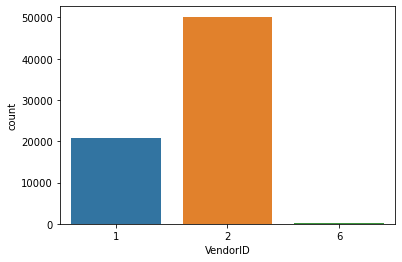

In [9]:
univariate_cat(data=taxi,x='VendorID')

In [10]:
taxi['VendorID']=taxi['VendorID'].replace([5,6],'others')

In [11]:
taxi['VendorID'].unique()

array([2, 1, 'others'], dtype=object)

In [12]:
taxi.dtypes[taxi.dtypes=='object']

VendorID              object
store_and_fwd_flag    object
dtype: object

Total missing values : 2660

Total count of unique categories: 2

Unique categories :
['N', None, 'Y']
Value count and %
:      count percentage
N    67674     98.79%
NaN   2660        NaN
Y      828      1.21%


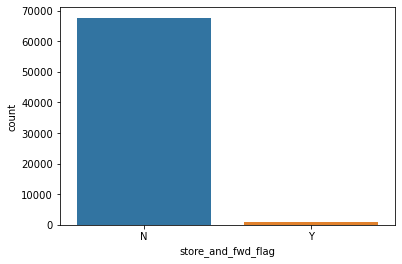

In [13]:
univariate_cat(data=taxi,x='store_and_fwd_flag')

In [14]:
taxi['store_and_fwd_flag']=taxi['store_and_fwd_flag'].replace(np.nan,'other')

In [15]:
taxi.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          2660
trip_distance               0
RatecodeID               2660
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     2660
airport_fee              2660
dtype: int64

In [16]:
# 1= Standard rate
# 2=JFK
# 3=Newark
# 4=Nassau or Westchester
# 5=Negotiated fare
# 6=Group ride


In [17]:
taxi['RatecodeID']=taxi['RatecodeID'].map({1:'Standard_rate',2:'JFK',3:'Newark',4:'Nassau_or_Westchester',
                                          5:'Negotiated_fare',6:'Group_ride',99:'other'})

Total missing values : 2660

Total count of unique categories: 6

Unique categories :
['Standard_rate', nan, 'Negotiated_fare', 'JFK', 'Newark', 'Nassau_or_Westchester', 'other']
Value count and %
:                        count percentage
Standard_rate          64553     94.24%
JFK                     2826      4.13%
NaN                     2660        NaN
Negotiated_fare          612      0.89%
Newark                   217      0.32%
other                    206       0.3%
Nassau_or_Westchester     88      0.13%


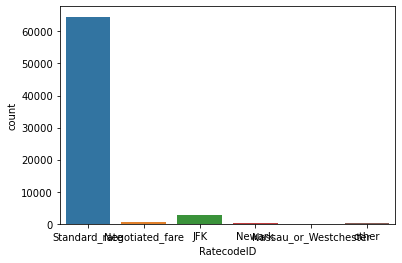

In [18]:
univariate_cat(data=taxi,x='RatecodeID')

In [19]:
taxi['RatecodeID']=taxi['RatecodeID'].replace(np.nan,'other')

In [20]:
taxi['RatecodeID'].value_counts(dropna=False)

Standard_rate            64553
other                     2866
JFK                       2826
Negotiated_fare            612
Newark                     217
Nassau_or_Westchester       88
Name: RatecodeID, dtype: int64

In [21]:
taxi

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
11293,2,2022-06-01 08:48:20,2022-06-01 09:00:30,1.0,1.75,Standard_rate,N,143,48,1,9.5,0.0,0.5,2.00,0.00,0.3,14.80,2.5,0.0
3241804,2,2022-06-29 12:30:59,2022-06-29 13:20:10,1.0,9.16,Standard_rate,N,143,95,2,36.0,0.0,0.5,0.00,0.00,0.3,39.30,2.5,0.0
2122208,1,2022-06-19 01:03:50,2022-06-19 01:27:44,1.0,5.00,Standard_rate,N,249,80,1,20.0,3.0,0.5,2.00,0.00,0.3,25.80,2.5,0.0
645015,2,2022-06-06 17:16:57,2022-06-06 17:35:51,1.0,3.02,Standard_rate,N,230,113,1,13.5,1.0,0.5,1.78,0.00,0.3,19.58,2.5,0.0
1752107,2,2022-06-15 22:09:34,2022-06-15 22:28:03,1.0,3.53,Standard_rate,N,90,237,1,14.5,0.5,0.5,2.74,0.00,0.3,21.04,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,2,2022-06-20 14:41:39,2022-06-20 14:59:51,1.0,4.49,Standard_rate,N,263,234,1,17.0,0.0,0.5,2.00,0.00,0.3,22.30,2.5,0.0
963395,2,2022-06-09 10:34:13,2022-06-09 10:43:23,1.0,1.51,Standard_rate,N,48,246,1,8.5,0.0,0.5,2.36,0.00,0.3,14.16,2.5,0.0
2215104,1,2022-06-20 06:49:59,2022-06-20 07:06:14,0.0,8.90,Standard_rate,N,140,138,1,25.5,2.5,0.5,5.30,6.55,0.3,40.65,2.5,0.0
1484405,2,2022-06-13 19:18:27,2022-06-13 19:22:38,3.0,0.90,Standard_rate,N,230,163,2,5.0,1.0,0.5,0.00,0.00,0.3,9.30,2.5,0.0


Total missing values : 0

Total count of unique categories: 5

Unique categories :
[1, 2, 0, 4, 3]
Value count and %
:    count percentage
1  53921     75.77%
2  13873     19.49%
0   2660      3.74%
3    363      0.51%
4    345      0.48%


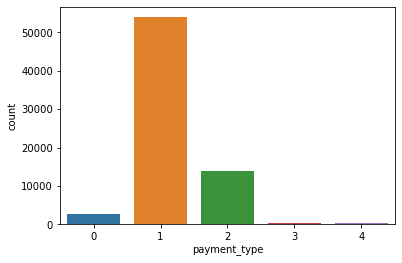

In [22]:
univariate_cat(data=taxi,x='payment_type')

In [23]:
# 1= Credit card
# 2= Cash
# 3= No charge
# 4= Dispute
# 5= Unknown
# 6= Voided trip

In [24]:
taxi['payment_type']=taxi['payment_type'].map({1:'Credit_card',2:'Cash',3:'No_charge',4:'Dispute',0:'Unknown'})

In [25]:
taxi['payment_type'].value_counts()

Credit_card    53921
Cash           13873
Unknown         2660
No_charge        363
Dispute          345
Name: payment_type, dtype: int64

In [26]:
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
11293,2,2022-06-01 08:48:20,2022-06-01 09:00:30,1.0,1.75,Standard_rate,N,143,48,Credit_card,9.5,0.0,0.5,2.00,0.0,0.3,14.80,2.5,0.0
3241804,2,2022-06-29 12:30:59,2022-06-29 13:20:10,1.0,9.16,Standard_rate,N,143,95,Cash,36.0,0.0,0.5,0.00,0.0,0.3,39.30,2.5,0.0
2122208,1,2022-06-19 01:03:50,2022-06-19 01:27:44,1.0,5.00,Standard_rate,N,249,80,Credit_card,20.0,3.0,0.5,2.00,0.0,0.3,25.80,2.5,0.0
645015,2,2022-06-06 17:16:57,2022-06-06 17:35:51,1.0,3.02,Standard_rate,N,230,113,Credit_card,13.5,1.0,0.5,1.78,0.0,0.3,19.58,2.5,0.0
1752107,2,2022-06-15 22:09:34,2022-06-15 22:28:03,1.0,3.53,Standard_rate,N,90,237,Credit_card,14.5,0.5,0.5,2.74,0.0,0.3,21.04,2.5,0.0


Total missing values : 2660

Total count of unique categories: 7

Unique categories :
[1.0, 2.0, nan, 3.0, 0.0, 4.0, 5.0, 6.0]
Value count and %
:      count percentage
0.0   1327      1.94%
1.0  50763      74.1%
2.0  10331     15.08%
3.0   2815      4.11%
4.0   1278      1.87%
5.0   1150      1.68%
6.0    838      1.22%
NaN   2660        NaN


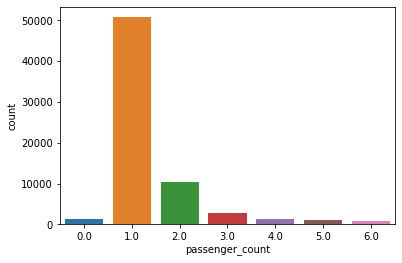

In [27]:
univariate_cat(data=taxi,x='passenger_count') #discrete

In [28]:
def univariate_num(data,x):
    """one numerical variable analysis """
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round( data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

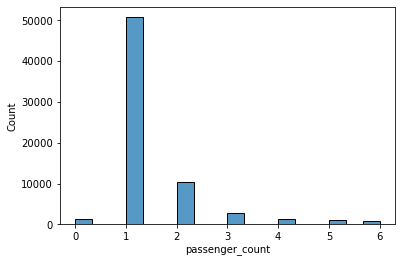

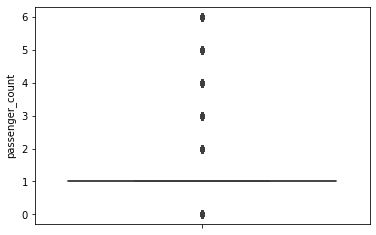

{'missing': 2660,
 'min': 0.0,
 'max': 6.0,
 'mean': 1.4,
 'var': 0.92,
 'std': 0.96,
 'range': 6.0,
 'q1': 1.0,
 'q2': 1.0,
 'q3': 1.0,
 'skewness': 2.74,
 'kurtosis': 8.32}

In [29]:
univariate_num(data=taxi,x='passenger_count')

In [30]:
taxi

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
11293,2,2022-06-01 08:48:20,2022-06-01 09:00:30,1.0,1.75,Standard_rate,N,143,48,Credit_card,9.5,0.0,0.5,2.00,0.00,0.3,14.80,2.5,0.0
3241804,2,2022-06-29 12:30:59,2022-06-29 13:20:10,1.0,9.16,Standard_rate,N,143,95,Cash,36.0,0.0,0.5,0.00,0.00,0.3,39.30,2.5,0.0
2122208,1,2022-06-19 01:03:50,2022-06-19 01:27:44,1.0,5.00,Standard_rate,N,249,80,Credit_card,20.0,3.0,0.5,2.00,0.00,0.3,25.80,2.5,0.0
645015,2,2022-06-06 17:16:57,2022-06-06 17:35:51,1.0,3.02,Standard_rate,N,230,113,Credit_card,13.5,1.0,0.5,1.78,0.00,0.3,19.58,2.5,0.0
1752107,2,2022-06-15 22:09:34,2022-06-15 22:28:03,1.0,3.53,Standard_rate,N,90,237,Credit_card,14.5,0.5,0.5,2.74,0.00,0.3,21.04,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,2,2022-06-20 14:41:39,2022-06-20 14:59:51,1.0,4.49,Standard_rate,N,263,234,Credit_card,17.0,0.0,0.5,2.00,0.00,0.3,22.30,2.5,0.0
963395,2,2022-06-09 10:34:13,2022-06-09 10:43:23,1.0,1.51,Standard_rate,N,48,246,Credit_card,8.5,0.0,0.5,2.36,0.00,0.3,14.16,2.5,0.0
2215104,1,2022-06-20 06:49:59,2022-06-20 07:06:14,0.0,8.90,Standard_rate,N,140,138,Credit_card,25.5,2.5,0.5,5.30,6.55,0.3,40.65,2.5,0.0
1484405,2,2022-06-13 19:18:27,2022-06-13 19:22:38,3.0,0.90,Standard_rate,N,230,163,Cash,5.0,1.0,0.5,0.00,0.00,0.3,9.30,2.5,0.0


In [31]:
taxi.drop(columns=['DOLocationID','PULocationID'],inplace=True)

In [32]:
taxi[taxi['fare_amount']<2.5].shape

(525, 17)

In [33]:
taxi1=taxi[taxi['fare_amount']>=2.5]

In [34]:
taxi1.shape

(70637, 17)

In [38]:
taxi1.dtypes[taxi1.dtypes!='object'].index

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

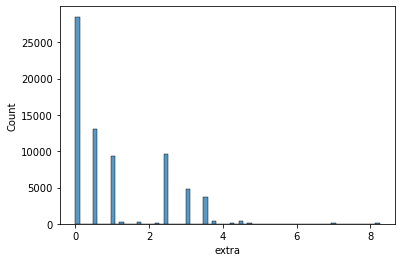

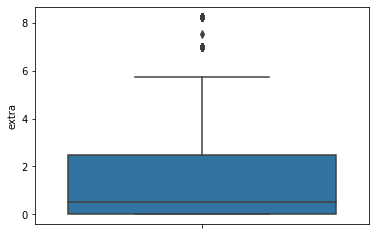

{'missing': 0,
 'min': 0.0,
 'max': 8.25,
 'mean': 1.03,
 'var': 1.58,
 'std': 1.26,
 'range': 8.25,
 'q1': 0.0,
 'q2': 0.5,
 'q3': 2.5,
 'skewness': 1.14,
 'kurtosis': 0.75}

In [40]:
univariate_num(data=taxi1,x='extra')

In [42]:
taxi1[taxi1['extra']==0].shape

(28530, 17)

In [48]:
taxi1['fare_amount'].describe(percentiles=[.7,.8,.9,.95,.96,.97,.98,.99]).T

count    70637.000000
mean        15.515271
std         47.583181
min          2.500000
50%         10.500000
70%         15.000000
80%         19.500000
90%         32.000000
95%         52.000000
96%         52.000000
97%         52.000000
98%         52.000000
99%         64.000000
max       6977.000000
Name: fare_amount, dtype: float64

In [50]:
taxi[taxi['fare_amount']>=5000]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1028144,2,2022-06-09 19:39:42,2022-06-09 20:20:12,1.0,14.89,Standard_rate,N,Cash,6977.0,1.0,0.5,0.0,0.0,0.3,6981.30,2.5,0.00
3201244,2,2022-06-28 23:46:52,2022-06-29 00:09:25,1.0,3.27,Standard_rate,N,Cash,6966.5,0.5,0.5,0.0,0.0,0.3,6970.30,2.5,0.00
557418,2,2022-06-05 19:03:17,2022-06-05 19:35:56,1.0,6.51,Standard_rate,N,Cash,6975.5,0.0,0.5,0.0,0.0,0.3,6977.55,0.0,1.25


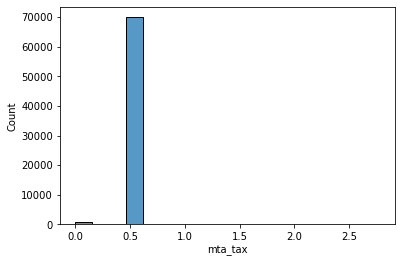

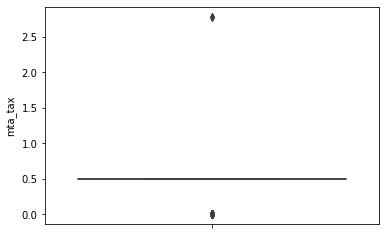

{'missing': 0,
 'min': 0.0,
 'max': 2.78,
 'mean': 0.49,
 'var': 0.0,
 'std': 0.05,
 'range': 2.78,
 'q1': 0.5,
 'q2': 0.5,
 'q3': 0.5,
 'skewness': -6.5,
 'kurtosis': 188.41}

In [51]:
univariate_num(data=taxi1,x='mta_tax')

In [52]:
taxi1['mta_tax'].describe(percentiles=[.7,.8,.9,.95,.96,.97,.98,.99]).T

count    70637.000000
mean         0.494919
std          0.051908
min          0.000000
50%          0.500000
70%          0.500000
80%          0.500000
90%          0.500000
95%          0.500000
96%          0.500000
97%          0.500000
98%          0.500000
99%          0.500000
max          2.780000
Name: mta_tax, dtype: float64

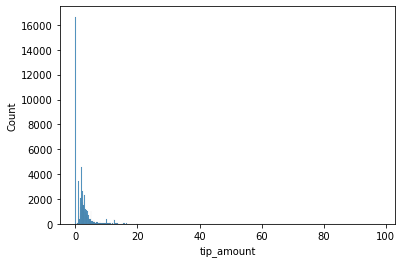

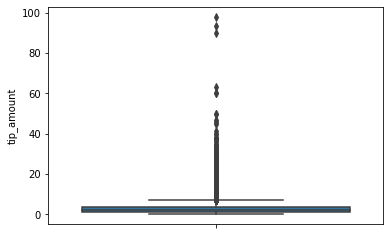

{'missing': 0,
 'min': 0.0,
 'max': 98.0,
 'mean': 2.81,
 'var': 10.4,
 'std': 3.22,
 'range': 98.0,
 'q1': 1.0,
 'q2': 2.2,
 'q3': 3.45,
 'skewness': 3.82,
 'kurtosis': 44.22}

In [53]:
univariate_num(data=taxi1,x='tip_amount')

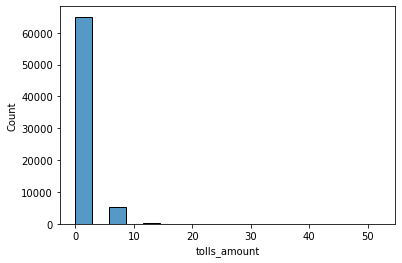

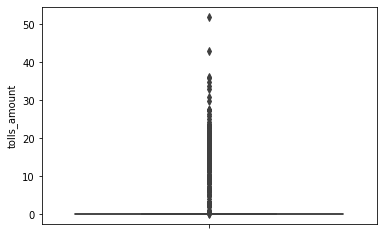

{'missing': 0,
 'min': 0.0,
 'max': 52.0,
 'mean': 0.57,
 'var': 4.33,
 'std': 2.08,
 'range': 52.0,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 0.0,
 'skewness': 4.8,
 'kurtosis': 36.86}

In [54]:
univariate_num(data=taxi1,x='tolls_amount')

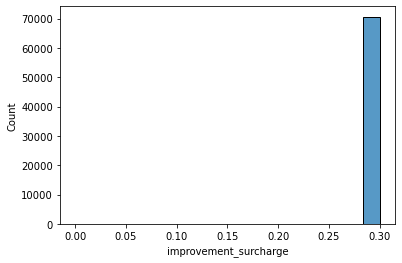

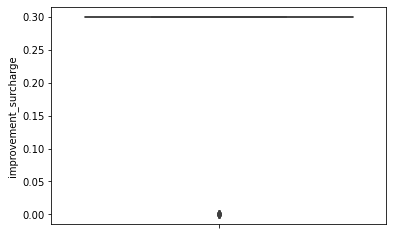

{'missing': 0,
 'min': 0.0,
 'max': 0.3,
 'mean': 0.3,
 'var': 0.0,
 'std': 0.0,
 'range': 0.3,
 'q1': 0.3,
 'q2': 0.3,
 'q3': 0.3,
 'skewness': -76.71,
 'kurtosis': 5881.83}

In [55]:
univariate_num(data=taxi1,x='improvement_surcharge')

In [56]:
taxi1.drop(columns=['improvement_surcharge'],inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
taxi1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee
11293,2,2022-06-01 08:48:20,2022-06-01 09:00:30,1.0,1.75,Standard_rate,N,Credit_card,9.5,0.0,0.5,2.00,0.00,14.80,2.5,0.0
3241804,2,2022-06-29 12:30:59,2022-06-29 13:20:10,1.0,9.16,Standard_rate,N,Cash,36.0,0.0,0.5,0.00,0.00,39.30,2.5,0.0
2122208,1,2022-06-19 01:03:50,2022-06-19 01:27:44,1.0,5.00,Standard_rate,N,Credit_card,20.0,3.0,0.5,2.00,0.00,25.80,2.5,0.0
645015,2,2022-06-06 17:16:57,2022-06-06 17:35:51,1.0,3.02,Standard_rate,N,Credit_card,13.5,1.0,0.5,1.78,0.00,19.58,2.5,0.0
1752107,2,2022-06-15 22:09:34,2022-06-15 22:28:03,1.0,3.53,Standard_rate,N,Credit_card,14.5,0.5,0.5,2.74,0.00,21.04,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,2,2022-06-20 14:41:39,2022-06-20 14:59:51,1.0,4.49,Standard_rate,N,Credit_card,17.0,0.0,0.5,2.00,0.00,22.30,2.5,0.0
963395,2,2022-06-09 10:34:13,2022-06-09 10:43:23,1.0,1.51,Standard_rate,N,Credit_card,8.5,0.0,0.5,2.36,0.00,14.16,2.5,0.0
2215104,1,2022-06-20 06:49:59,2022-06-20 07:06:14,0.0,8.90,Standard_rate,N,Credit_card,25.5,2.5,0.5,5.30,6.55,40.65,2.5,0.0
1484405,2,2022-06-13 19:18:27,2022-06-13 19:22:38,3.0,0.90,Standard_rate,N,Cash,5.0,1.0,0.5,0.00,0.00,9.30,2.5,0.0


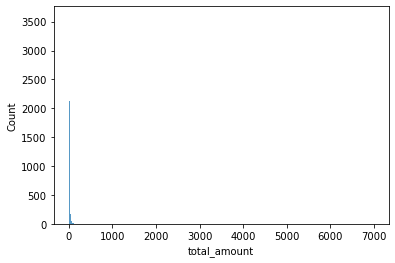

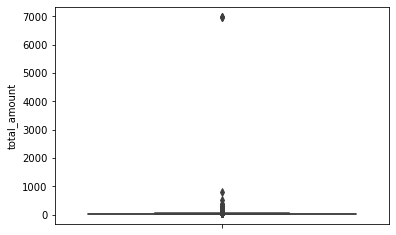

{'missing': 0,
 'min': 3.3,
 'max': 6981.3,
 'mean': 22.45,
 'var': 2374.85,
 'std': 48.73,
 'range': 6978.0,
 'q1': 12.36,
 'q2': 16.3,
 'q3': 23.3,
 'skewness': 123.63,
 'kurtosis': 17609.46}

In [59]:
univariate_num(data=taxi1,x='total_amount')

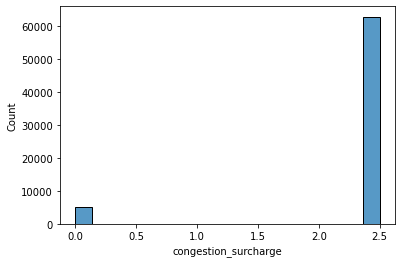

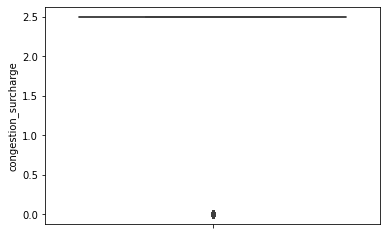

{'missing': 2658,
 'min': 0.0,
 'max': 2.5,
 'mean': 2.31,
 'var': 0.44,
 'std': 0.67,
 'range': 2.5,
 'q1': 2.5,
 'q2': 2.5,
 'q3': 2.5,
 'skewness': -3.17,
 'kurtosis': 8.08}

In [61]:
univariate_num(data=taxi1,x='congestion_surcharge')

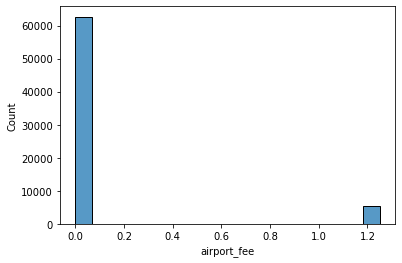

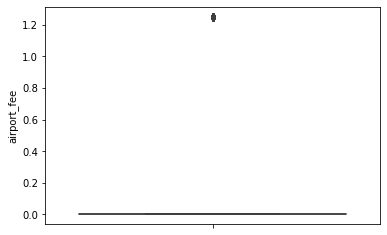

{'missing': 2658,
 'min': 0.0,
 'max': 1.25,
 'mean': 0.1,
 'var': 0.11,
 'std': 0.34,
 'range': 1.25,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 0.0,
 'skewness': 3.15,
 'kurtosis': 7.92}

In [63]:
univariate_num(data=taxi1,x='airport_fee')

In [65]:
taxi1[taxi1['airport_fee']==0].shape

(62683, 16)

## feature engineering

In [67]:
taxi1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [68]:
taxi['tpep_pickup_datetime'].min()

Timestamp('2002-10-21 12:53:50')

In [69]:
taxi['tpep_pickup_datetime'].max()

Timestamp('2022-07-01 00:36:12')

In [70]:
# Date: month,weekend/weekday,public_holiday,time of pickup (early morniing,morning,afternoon,evening,night,late night)
# two date: duration,

In [72]:
taxi1['month']=taxi1['tpep_pickup_datetime'].dt.month

C:\Users\HP\AppData\Local\Temp/ipykernel_8364/2902181035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['month']=taxi1['tpep_pickup_datetime'].dt.month


In [73]:
taxi1['year']=taxi1['tpep_pickup_datetime'].dt.year

C:\Users\HP\AppData\Local\Temp/ipykernel_8364/2214737363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['year']=taxi1['tpep_pickup_datetime'].dt.year


In [75]:
taxi1['year'].value_counts()

2022    70630
2002        7
Name: year, dtype: int64

In [76]:
taxi1['week_of_day']=taxi1['tpep_pickup_datetime'].dt.dayofweek

C:\Users\HP\AppData\Local\Temp/ipykernel_8364/582882557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['week_of_day']=taxi1['tpep_pickup_datetime'].dt.dayofweek


In [77]:
taxi1['month'].value_counts()

6     70627
10        7
7         2
5         1
Name: month, dtype: int64

In [78]:
tax1=taxi1[taxi1['month']==6]
tax1=taxi1[taxi1['year']==2022]

In [79]:
taxi1['isweekend']=np.where(taxi1['week_of_day'].isin([5,6]),1,0)

C:\Users\HP\AppData\Local\Temp/ipykernel_8364/3520564055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['isweekend']=np.where(taxi1['week_of_day'].isin([5,6]),1,0)


In [80]:
taxi1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee,month,year,week_of_day,isweekend
11293,2,2022-06-01 08:48:20,2022-06-01 09:00:30,1.0,1.75,Standard_rate,N,Credit_card,9.5,0.0,0.5,2.00,0.00,14.80,2.5,0.0,6,2022,2,0
3241804,2,2022-06-29 12:30:59,2022-06-29 13:20:10,1.0,9.16,Standard_rate,N,Cash,36.0,0.0,0.5,0.00,0.00,39.30,2.5,0.0,6,2022,2,0
2122208,1,2022-06-19 01:03:50,2022-06-19 01:27:44,1.0,5.00,Standard_rate,N,Credit_card,20.0,3.0,0.5,2.00,0.00,25.80,2.5,0.0,6,2022,6,1
645015,2,2022-06-06 17:16:57,2022-06-06 17:35:51,1.0,3.02,Standard_rate,N,Credit_card,13.5,1.0,0.5,1.78,0.00,19.58,2.5,0.0,6,2022,0,0
1752107,2,2022-06-15 22:09:34,2022-06-15 22:28:03,1.0,3.53,Standard_rate,N,Credit_card,14.5,0.5,0.5,2.74,0.00,21.04,2.5,0.0,6,2022,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,2,2022-06-20 14:41:39,2022-06-20 14:59:51,1.0,4.49,Standard_rate,N,Credit_card,17.0,0.0,0.5,2.00,0.00,22.30,2.5,0.0,6,2022,0,0
963395,2,2022-06-09 10:34:13,2022-06-09 10:43:23,1.0,1.51,Standard_rate,N,Credit_card,8.5,0.0,0.5,2.36,0.00,14.16,2.5,0.0,6,2022,3,0
2215104,1,2022-06-20 06:49:59,2022-06-20 07:06:14,0.0,8.90,Standard_rate,N,Credit_card,25.5,2.5,0.5,5.30,6.55,40.65,2.5,0.0,6,2022,0,0
1484405,2,2022-06-13 19:18:27,2022-06-13 19:22:38,3.0,0.90,Standard_rate,N,Cash,5.0,1.0,0.5,0.00,0.00,9.30,2.5,0.0,6,2022,0,0


In [81]:
taxi1['day']=taxi1['tpep_pickup_datetime'].dt.day

C:\Users\HP\AppData\Local\Temp/ipykernel_8364/1902479973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['day']=taxi1['tpep_pickup_datetime'].dt.day


In [86]:
def day_cut(x):
    if x<=10:
        return 'starting_of_month'
    elif x>10 and x<=20:
        return 'mid_of_month'
    else:
        return 'End_of_month'

In [87]:
taxi1['day_cat']=taxi1['day'].apply(lambda a:day_cut(a))

C:\Users\HP\AppData\Local\Temp/ipykernel_8364/2197867038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['day_cat']=taxi1['day'].apply(lambda a:day_cut(a))


In [90]:
taxi1['day_cat'].value_counts()

starting_of_month    24395
mid_of_month         23261
End_of_month         22981
Name: day_cat, dtype: int64

In [91]:
taxi1['day']

11293       1
3241804    29
2122208    19
645015      6
1752107    15
           ..
2249467    20
963395      9
2215104    20
1484405    13
305711      3
Name: day, Length: 70637, dtype: int64

In [92]:
taxi1['hour']=taxi1['tpep_pickup_datetime'].dt.hour

C:\Users\HP\AppData\Local\Temp/ipykernel_8364/2673408928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['hour']=taxi1['tpep_pickup_datetime'].dt.hour


In [93]:
taxi1['hour'].value_counts()

18    5002
17    4698
19    4608
15    4323
14    4309
16    4248
13    3966
12    3855
21    3792
20    3765
11    3677
22    3587
10    3333
9     3038
23    2869
8     2746
0     2060
7     2041
1     1313
6     1076
2      880
3      574
5      489
4      388
Name: hour, dtype: int64

In [94]:
taxi1['minute']=taxi1['tpep_pickup_datetime'].dt.minute

C:\Users\HP\AppData\Local\Temp/ipykernel_8364/3817820385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['minute']=taxi1['tpep_pickup_datetime'].dt.minute


In [ ]:
early morning:4-8
morning:8-12
even:16-20
night:20-24
mid nig-

In [96]:
def hour_category(x):
    if x>=4 and x<8:
        return 'early_morning'
    elif x>=8 and x<12:
        return 'morning'
    elif x>=12 and x<16:
        return 'Afternoon'
    elif x>=16 and x<20:
        return 'Evening'
    elif x>=20 and x<24:
        return 'night'
    elif x>=0 and x<4:
        return 'midnight'
    else:
        return 'unkown'

In [99]:
taxi1['hours_cat']=taxi1['hour'].apply(lambda a:hour_category(a))

C:\Users\HP\AppData\Local\Temp/ipykernel_8364/3250730328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['hours_cat']=taxi1['hour'].apply(lambda a:hour_category(a))


In [102]:
taxi1['hours_cat'].value_counts(normalize=True)

Evening          0.262695
Afternoon        0.232923
night            0.198380
morning          0.181123
midnight         0.068335
early_morning    0.056543
Name: hours_cat, dtype: float64

In [104]:
taxi1['duration']=(taxi1['tpep_dropoff_datetime']-taxi1['tpep_pickup_datetime'])*24

C:\Users\HP\AppData\Local\Temp/ipykernel_8364/2613786903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['duration']=(taxi1['tpep_dropoff_datetime']-taxi1['tpep_pickup_datetime'])*24


In [107]:
taxi1['duration'].min()

Timedelta('-41472 days +10:51:26.290448384')

In [108]:
taxi1['airport']=np.where(taxi1['airport_fee']==0,0,1)

C:\Users\HP\AppData\Local\Temp/ipykernel_8364/3751949944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['airport']=np.where(taxi1['airport_fee']==0,0,1)


In [111]:
taxi1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,year,week_of_day,isweekend,day,day_cat,hour,minute,hours_cat,duration,airport
11293,2,2022-06-01 08:48:20,2022-06-01 09:00:30,1.0,1.75,Standard_rate,N,Credit_card,9.5,0.0,...,2022,2,0,1,starting_of_month,8,48,morning,0 days 04:52:00,0
3241804,2,2022-06-29 12:30:59,2022-06-29 13:20:10,1.0,9.16,Standard_rate,N,Cash,36.0,0.0,...,2022,2,0,29,End_of_month,12,30,Afternoon,0 days 19:40:24,0
2122208,1,2022-06-19 01:03:50,2022-06-19 01:27:44,1.0,5.00,Standard_rate,N,Credit_card,20.0,3.0,...,2022,6,1,19,mid_of_month,1,3,midnight,0 days 09:33:36,0
645015,2,2022-06-06 17:16:57,2022-06-06 17:35:51,1.0,3.02,Standard_rate,N,Credit_card,13.5,1.0,...,2022,0,0,6,starting_of_month,17,16,Evening,0 days 07:33:36,0
1752107,2,2022-06-15 22:09:34,2022-06-15 22:28:03,1.0,3.53,Standard_rate,N,Credit_card,14.5,0.5,...,2022,2,0,15,mid_of_month,22,9,night,0 days 07:23:36,0


In [137]:
def fare_cut(x):
    if x<=10:
        return '(0,10]'
    elif x>10 and x<=20:
        return '[10-20]'
    elif x>20 and x<=30:
        return '(20,30]'
    elif x>30 and x<=40:
        return '(30,40]'
    elif x>40 and x<=50:
        return '(40,50]'
    elif x>50 and x<=60:
        return '(50,60]'
    elif x>60 and x<=70:
        return '(60,70]'
    elif x>70 and x<=80:
        return '(70,80]'
    elif x>80 and x<=90:
        return '(80,90]'
    elif x>90 and x<=100:
        return '(90,100]'
    else:
        return '100+'

In [138]:
taxi1['fare_cat']=taxi1['total_amount'].apply(lambda a:fare_cut(a))

C:\Users\HP\AppData\Local\Temp/ipykernel_8364/4110563148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['fare_cat']=taxi1['total_amount'].apply(lambda a:fare_cut(a))


<AxesSubplot:xlabel='fare_cat', ylabel='Count'>

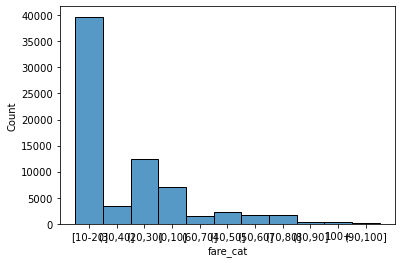

In [139]:
sns.histplot(taxi1['fare_cat'])

In [147]:
taxi1['duration']=((taxi1['tpep_dropoff_datetime']-taxi1['tpep_pickup_datetime'])/pd.Timedelta(minutes=1))

C:\Users\HP\AppData\Local\Temp/ipykernel_8364/3602048154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['duration']=((taxi1['tpep_dropoff_datetime']-taxi1['tpep_pickup_datetime'])/pd.Timedelta(minutes=1))


In [148]:
taxi1['duration'].max()

10321946.083333334

In [149]:
def duration_cat(x):
    if x<15:
        return 'duration_bt_0_15m'
    elif x<30:
        return 'duration_bt_0_30m'
    elif x>=30 and x<60:
        return 'duration_bt_30_60m'
    elif x>=60 and x<120:
        return 'duration_bt_60_120m'
    else:
        return 'duration_morethan_120m'

In [150]:
tax1['duration_Cat']=taxi1['duration'].apply(lambda y:duration_cat(y))

C:\Users\HP\AppData\Local\Temp/ipykernel_8364/268102782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tax1['duration_Cat']=taxi1['duration'].apply(lambda y:duration_cat(y))


In [151]:
tax1['duration_Cat'].value_counts()

duration_bt_0_15m         41743
duration_bt_0_30m         20679
duration_bt_30_60m         6757
duration_bt_60_120m        1350
duration_morethan_120m      101
Name: duration_Cat, dtype: int64

### missing values

In [152]:
taxi1.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          2658
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
total_amount                0
congestion_surcharge     2658
airport_fee              2658
month                       0
year                        0
week_of_day                 0
isweekend                   0
day                         0
day_cat                     0
hour                        0
minute                      0
hours_cat                   0
duration                    0
airport                     0
fare_cat                    0
dtype: int64

In [154]:
taxi1[taxi1.isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,week_of_day,isweekend,day,day_cat,hour,minute,hours_cat,duration,airport,fare_cat
11293,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3241804,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2122208,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645015,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752107,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963395,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2215104,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1484405,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
temp0=taxi1[taxi1['passenger_count'].isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,week_of_day,isweekend,day,day_cat,hour,minute,hours_cat,duration,airport,fare_cat
3478942,1,2022-06-13 09:18:34,2022-06-13 09:37:55,NaN,2.20,other,other,Unknown,13.50,0.0,...,0,0,13,mid_of_month,9,18,morning,19.350000,1,[10-20]
3448196,1,2022-06-06 10:13:11,2022-06-06 10:45:52,NaN,2.40,other,other,Unknown,20.50,0.0,...,0,0,6,starting_of_month,10,13,morning,32.683333,1,"(20,30]"
3434352,2,2022-06-03 00:36:45,2022-06-03 00:50:32,NaN,3.18,other,other,Unknown,13.78,0.0,...,4,0,3,starting_of_month,0,36,midnight,13.783333,1,[10-20]
3499355,others,2022-06-17 17:06:15,2022-06-17 18:06:10,NaN,4.65,other,other,Unknown,57.20,0.0,...,4,0,17,mid_of_month,17,6,Evening,59.916667,1,"(50,60]"
3547051,2,2022-06-28 09:00:42,2022-06-28 09:53:34,NaN,28.45,other,other,Unknown,84.87,0.0,...,1,0,28,End_of_month,9,0,morning,52.866667,1,100+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3500520,2,2022-06-17 21:33:00,2022-06-17 21:46:00,NaN,2.15,other,other,Unknown,12.11,0.0,...,4,0,17,mid_of_month,21,33,night,13.000000,1,[10-20]
3470628,2,2022-06-11 10:23:00,2022-06-11 10:39:00,NaN,0.79,other,other,Unknown,16.17,0.0,...,5,1,11,mid_of_month,10,23,morning,16.000000,1,[10-20]
3449376,1,2022-06-06 18:51:46,2022-06-06 19:09:18,NaN,3.80,other,other,Unknown,15.00,1.0,...,0,0,6,starting_of_month,18,51,Evening,17.533333,1,"(20,30]"
3491838,2,2022-06-16 08:56:56,2022-06-16 09:10:07,NaN,2.78,other,other,Unknown,13.84,0.0,...,3,0,16,mid_of_month,8,56,morning,13.183333,1,"(20,30]"


In [157]:
taxi2=taxi1.dropna()

In [158]:
taxi2.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
total_amount             0
congestion_surcharge     0
airport_fee              0
month                    0
year                     0
week_of_day              0
isweekend                0
day                      0
day_cat                  0
hour                     0
minute                   0
hours_cat                0
duration                 0
airport                  0
fare_cat                 0
dtype: int64

### outliers

In [160]:
taxi2.describe(percentiles=[.01,.02,.03,.04,0.5,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

ValueError: percentiles cannot contain duplicates

In [161]:
taxi

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
11293,2,2022-06-01 08:48:20,2022-06-01 09:00:30,1.0,1.75,Standard_rate,N,Credit_card,9.5,0.0,0.5,2.00,0.00,0.3,14.80,2.5,0.0
3241804,2,2022-06-29 12:30:59,2022-06-29 13:20:10,1.0,9.16,Standard_rate,N,Cash,36.0,0.0,0.5,0.00,0.00,0.3,39.30,2.5,0.0
2122208,1,2022-06-19 01:03:50,2022-06-19 01:27:44,1.0,5.00,Standard_rate,N,Credit_card,20.0,3.0,0.5,2.00,0.00,0.3,25.80,2.5,0.0
645015,2,2022-06-06 17:16:57,2022-06-06 17:35:51,1.0,3.02,Standard_rate,N,Credit_card,13.5,1.0,0.5,1.78,0.00,0.3,19.58,2.5,0.0
1752107,2,2022-06-15 22:09:34,2022-06-15 22:28:03,1.0,3.53,Standard_rate,N,Credit_card,14.5,0.5,0.5,2.74,0.00,0.3,21.04,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,2,2022-06-20 14:41:39,2022-06-20 14:59:51,1.0,4.49,Standard_rate,N,Credit_card,17.0,0.0,0.5,2.00,0.00,0.3,22.30,2.5,0.0
963395,2,2022-06-09 10:34:13,2022-06-09 10:43:23,1.0,1.51,Standard_rate,N,Credit_card,8.5,0.0,0.5,2.36,0.00,0.3,14.16,2.5,0.0
2215104,1,2022-06-20 06:49:59,2022-06-20 07:06:14,0.0,8.90,Standard_rate,N,Credit_card,25.5,2.5,0.5,5.30,6.55,0.3,40.65,2.5,0.0
1484405,2,2022-06-13 19:18:27,2022-06-13 19:22:38,3.0,0.90,Standard_rate,N,Cash,5.0,1.0,0.5,0.00,0.00,0.3,9.30,2.5,0.0


In [164]:
taxi2.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime'],inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [165]:
obj_var=taxi2.dtypes[taxi2.dtypes=='object'].index

In [169]:
num_var=taxi2.dtypes[taxi2.dtypes!='object'].index

In [170]:
taxi_num=taxi2[num_var]
taxi_obj=taxi2[obj_var]

In [171]:
def outiliers(x):
    x=x.clip(upper=x.quantile(.99))
#     x=x.clip(lower=x.quantile(.01))
    return x

In [172]:
taxi_num=taxi_num.apply(outiliers)

In [173]:
taxi_num

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee,month,year,week_of_day,isweekend,day,hour,minute,duration,airport
11293,1.0,1.75,9.5,0.0,0.5,2.00,0.00,14.80,2.5,0.0,6.0,2022,2,0,1.0,8,48,12.166667,0
3241804,1.0,9.16,36.0,0.0,0.5,0.00,0.00,39.30,2.5,0.0,6.0,2022,2,0,29.0,12,30,49.183333,0
2122208,1.0,5.00,20.0,3.0,0.5,2.00,0.00,25.80,2.5,0.0,6.0,2022,6,1,19.0,1,3,23.900000,0
645015,1.0,3.02,13.5,1.0,0.5,1.78,0.00,19.58,2.5,0.0,6.0,2022,0,0,6.0,17,16,18.900000,0
1752107,1.0,3.53,14.5,0.5,0.5,2.74,0.00,21.04,2.5,0.0,6.0,2022,2,0,15.0,22,9,18.483333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,1.0,4.49,17.0,0.0,0.5,2.00,0.00,22.30,2.5,0.0,6.0,2022,0,0,20.0,14,41,18.200000,0
963395,1.0,1.51,8.5,0.0,0.5,2.36,0.00,14.16,2.5,0.0,6.0,2022,3,0,9.0,10,34,9.166667,0
2215104,0.0,8.90,25.5,2.5,0.5,5.30,6.55,40.65,2.5,0.0,6.0,2022,0,0,20.0,6,49,16.250000,0
1484405,3.0,0.90,5.0,1.0,0.5,0.00,0.00,9.30,2.5,0.0,6.0,2022,0,0,13.0,19,18,4.183333,0


In [178]:
taxi_num.describe(percentiles=[.7,.8,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,50%,70%,80%,90%,95%,96%,97%,98%,99%,max
passenger_count,67979.0,1.398667,0.959772,0.0,1.000000,1.000000,2.000000,2.00,3.000000,4.00,4.000000,5.000000,6.00000,6.000
trip_distance,67979.0,3.496592,4.290748,0.0,1.900000,3.030000,4.360000,9.02,15.491000,17.09,17.876600,18.680000,20.26000,20.260
fare_amount,67979.0,14.729483,12.488385,2.5,10.500000,14.500000,19.000000,31.20,52.000000,52.00,52.000000,52.000000,62.50000,62.500
extra,67979.0,1.056353,1.220956,0.0,0.500000,1.000000,2.500000,3.00,3.500000,3.50,3.500000,3.500000,3.75000,3.750
mta_tax,67979.0,0.494837,0.050548,0.0,0.500000,0.500000,0.500000,0.50,0.500000,0.50,0.500000,0.500000,0.50000,0.500
tip_amount,67979.0,2.722777,2.912769,0.0,2.160000,3.060000,3.850000,5.66,9.550000,10.27,11.960000,12.620000,15.00000,15.000
tolls_amount,67979.0,0.515386,1.760761,0.0,0.000000,0.000000,0.000000,0.00,6.550000,6.55,6.550000,6.550000,6.55000,6.550
total_amount,67979.0,21.585429,15.946435,3.3,15.960000,20.800000,25.800000,43.35,63.100000,67.85,73.100000,75.720000,81.12000,81.120
congestion_surcharge,67979.0,2.307624,0.666286,0.0,2.500000,2.500000,2.500000,2.50,2.500000,2.50,2.500000,2.500000,2.50000,2.500
airport_fee,67979.0,0.097383,0.335033,0.0,0.000000,0.000000,0.000000,0.00,1.250000,1.25,1.250000,1.250000,1.25000,1.250


In [179]:
taxi_final=pd.concat([taxi_num,taxi_obj],axis=1)

In [180]:
taxi_final

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee,...,minute,duration,airport,VendorID,RatecodeID,store_and_fwd_flag,payment_type,day_cat,hours_cat,fare_cat
11293,1.0,1.75,9.5,0.0,0.5,2.00,0.00,14.80,2.5,0.0,...,48,12.166667,0,2,Standard_rate,N,Credit_card,starting_of_month,morning,[10-20]
3241804,1.0,9.16,36.0,0.0,0.5,0.00,0.00,39.30,2.5,0.0,...,30,49.183333,0,2,Standard_rate,N,Cash,End_of_month,Afternoon,"(30,40]"
2122208,1.0,5.00,20.0,3.0,0.5,2.00,0.00,25.80,2.5,0.0,...,3,23.900000,0,1,Standard_rate,N,Credit_card,mid_of_month,midnight,"(20,30]"
645015,1.0,3.02,13.5,1.0,0.5,1.78,0.00,19.58,2.5,0.0,...,16,18.900000,0,2,Standard_rate,N,Credit_card,starting_of_month,Evening,[10-20]
1752107,1.0,3.53,14.5,0.5,0.5,2.74,0.00,21.04,2.5,0.0,...,9,18.483333,0,2,Standard_rate,N,Credit_card,mid_of_month,night,"(20,30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,1.0,4.49,17.0,0.0,0.5,2.00,0.00,22.30,2.5,0.0,...,41,18.200000,0,2,Standard_rate,N,Credit_card,mid_of_month,Afternoon,"(20,30]"
963395,1.0,1.51,8.5,0.0,0.5,2.36,0.00,14.16,2.5,0.0,...,34,9.166667,0,2,Standard_rate,N,Credit_card,starting_of_month,morning,[10-20]
2215104,0.0,8.90,25.5,2.5,0.5,5.30,6.55,40.65,2.5,0.0,...,49,16.250000,0,1,Standard_rate,N,Credit_card,mid_of_month,early_morning,"(40,50]"
1484405,3.0,0.90,5.0,1.0,0.5,0.00,0.00,9.30,2.5,0.0,...,18,4.183333,0,2,Standard_rate,N,Cash,mid_of_month,Evening,"(0,10]"


### Multicollinarity 

In [189]:
taxi_final.drop(columns=['month','year','fare_amount'],inplace=True)

In [190]:
cr=taxi_final.corr()
cr=cr[abs(cr)>0.7]

<AxesSubplot:>

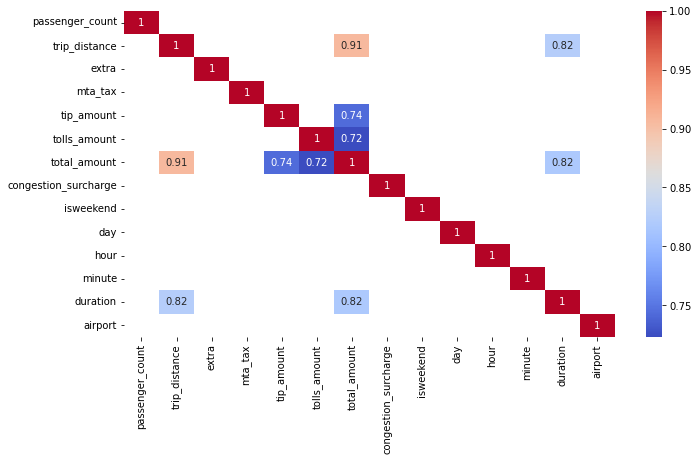

In [191]:
plt.figure(figsize=(11,6))
sns.heatmap(cr,annot=True,cmap='coolwarm')

In [196]:
taxi_final.drop(columns=['fare_cat'],inplace=True)

In [192]:
taxi_final.drop(columns=['airport_fee','week_of_day'],inplace=True)

KeyError: "['airport_fee' 'week_of_day'] not found in axis"

## Dummy creation

In [197]:
final=pd.get_dummies(data=taxi_final,drop_first=True)

In [198]:
final.head()

,passenger_count,trip_distance,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,isweekend,day,...,payment_type_Credit_card,payment_type_Dispute,payment_type_No_charge,day_cat_mid_of_month,day_cat_starting_of_month,hours_cat_Evening,hours_cat_early_morning,hours_cat_midnight,hours_cat_morning,hours_cat_night
11293,1.0,1.75,0.0,0.5,2.00,0.0,14.80,2.5,0,1.0,...,1,0,0,0,1,0,0,0,1,0
3241804,1.0,9.16,0.0,0.5,0.00,0.0,39.30,2.5,0,29.0,...,0,0,0,0,0,0,0,0,0,0
2122208,1.0,5.00,3.0,0.5,2.00,0.0,25.80,2.5,1,19.0,...,1,0,0,1,0,0,0,1,0,0
645015,1.0,3.02,1.0,0.5,1.78,0.0,19.58,2.5,0,6.0,...,1,0,0,0,1,1,0,0,0,0
1752107,1.0,3.53,0.5,0.5,2.74,0.0,21.04,2.5,0,15.0,...,1,0,0,1,0,0,0,0,0,1


In [199]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV

In [200]:
y=final['total_amount']
x=final.drop('total_amount',axis=1)

In [201]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [209]:
# criterion:{'squared error','absolute error','poisson'}

In [202]:
rfr=RandomForestRegressor()

In [203]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [204]:
rfr.score(x_train,y_train)

0.9973483473176417

In [205]:
rfr.score(x_test,y_test)

0.9844432244231889

In [207]:
predicted_train=rfr.predict(x_train)

In [208]:
np.mean((predicted_train-y_train)**2)

0.675993264193137

In [210]:
pred_test=rfr.predict(x_test)